# CENG414 Assignment 3

### Due: June 5, Monday-23:55

### Submission and Grading Policy

- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW3.ipynb (e.g., “e123456_HW3.ipynb”).
<!-- - Do not change variable names in the code blocks and the texts in the markdowns. -->
- **This is an individual assignment. You have to adhere to the academic integrity principles.**
- You are supposed to be able to interpret your findings. Hence, you shouldn't just find a number or result and just leave it. You need to comment on your findings by giving as much as **necessary** details.

**Q1.(35).** Generate k-means models for k= 2, 3, 4, 5, 6, 7, 8, 9, and 10. Determine the optimal value of k by looking at the wss graph and silhouette scores.   

**Q2.(35).** Generate DBSCAN models for epsilon values between 0.1 (included) and 2.5(included) incrementing it with steps=0.10 and for min_samples=5, 10, 15 and 20. Find the optimal value of k by adjusted rand scores. (While calculating adjusted rand scores, you will need true labels. Please see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score)   

**Q3.(30).** Plot the clusters for only the optimal k values based on predicted clusters that you obtain Task1 and Task2. Plot the original data based on the true labels. Did you obtain the same optimal k values in Task1 and Task2? Comment on the quality of the clusters that you obtained in Task1 and Task2. Can we predict the true label of the data by using clustering? Which algorithm gave a better result? What could be the reason one of them outperforms in different cases?


**Do not forget to use random_state and seeds for reproducibility.** 

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler

Needed libraries are implemented above.

In [3]:
# Set the seed value
random_state = 42  
# Opening dataset using pandas
# column names of data frame
colNames = ["x0","x1","y"]
#open dataset using pandas as a dataframe
data_frame = pd.read_csv("./data.csv", sep=",", names=colNames, skiprows=[0])

#class for taking features and labels seperated
class seperator():
    def __init__(self, data_frame):
        #  performs standardization on feature values
        #this is done for DBSCAN
        self.features =  StandardScaler().fit_transform(data_frame[['x0', 'x1']] )
        #get labels from data_frame which is named as y
        self.labels = data_frame["y"].values

#create seperator class member
seperate = seperator(data_frame)


Set the seed and open dataset as pandas dataframe. Then, created a class for easily accessing the labels and features.

C:\Users\90546\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\90546\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\90546\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

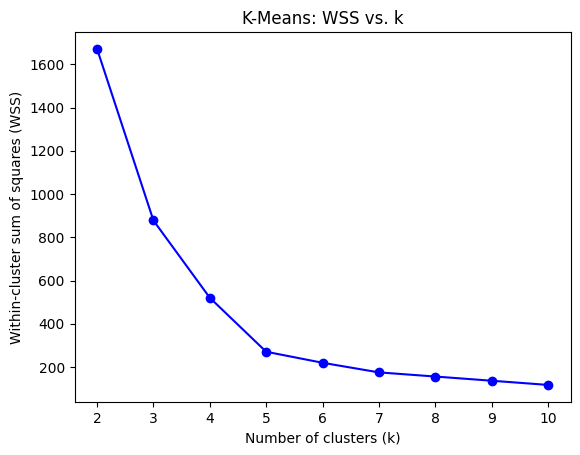

Optimal value of k: 4


In [4]:
#Answer of Question1
# list for wss and silhouette to keep them for all k values
wss_values = []
silhouette_scores = []
# create model and perfom clustering for all k values between 2 and 11(not included)
for k in range(2,11):
    # Create K-Means model
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    
    # Fit the model to the preprocessed data
    kmeans.fit(seperate.features)
    # get predicted labels 
    labels = kmeans.labels_
    # Calculate WSS using models inertia_ methode
    wss_values.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(seperate.features, labels, metric = 'euclidean'))


# Determine the optimal value of k
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to the index to get the actual value of k (since it starts from 2 not 0)

#Plote the wss values to determine optimal k value.
k_values = range(2, 11)
plt.plot(k_values, wss_values, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WSS)')
plt.title('K-Means: WSS vs. k')
plt.show()

# Print the results

print(f"Optimal value of k: {optimal_k}")

Description of answer 1: <br>
Firstly, I created emtly lists for keep silhouette value and wss measures. Then for all k values desired I created a model and calculated and assinged the WSS(by inertia_ methode) and silhouette values() to these lists.  <br>
Then I found the optimal k value between all desired k values by finding maximum silhouette value.  <br>
The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).A high value is desirable and indicates that the point is placed in the correct cluster. <br>
Since the silhouette value makes peek for k = 4 optimal value of k is 4 for k in range(2,12).  <br>
Also I ploted the WSS values for all k values and looked for point which the elbow shape is created. This point is 5.    <br>
However, the Elbow method is subjective and can be influenced by the dataset, making it sometimes difficult to identify a clear elbow point and Silhouette method takes into account both the cohesion and separation of clusters, providing a more objective measure of cluster quality. <br>
So the optimal k value in this conditions is "4" with the Silhouette methode. <br>


In [5]:
# Solution of Question 2
# eps_range is for epsilon values between 0.1 (included) and 2.5(included)
eps_range = [i / 10 for i in range(1, 26)]
# min_samples_values isfor min samples=5, 10, 15 and 20.
min_samples_values = [5, 10, 15, 20]
# adjusted_rand_scores is keeping all rand scores for all epsilon min_sample pairs
adjusted_rand_scores = []
#  k_count is cluster count k. k_count[x] is k value of adjusted_rand_scores[x]
k_counts = []
#  pair[x] contains (epsilon,min_sample) values of adjusted_rand_scores[x]
pair = []

# use DBSCAN for all epsilon min_sample values
for epsilon in eps_range:
    for min_samples in min_samples_values:
        # Create DBSCAN model
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        
        # Fit the model to the preprocessed data
        dbscan.fit(seperate.features)
        
        # Obtain the cluster assignments
        cluster_labels = dbscan.labels_
        
        # Calculate adjusted Rand score add it to adjusted_rand_scores list and add corresponding epsilon and min_sample values to pair list
        score = adjusted_rand_score(seperate.labels, cluster_labels)
        adjusted_rand_scores.append(score)
        pair.append((epsilon,min_samples))
        # Number of clusters in labels, ignoring noise if present.
        k =  len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        k_counts.append(k)
# Determine the optimal value of k and corresponding epsilon, min_sample values
optimal_index = adjusted_rand_scores.index(max(adjusted_rand_scores))
optimal_epsilon = pair[optimal_index][0]
optimal_min_samples = pair[optimal_index][1]
optimal_k = k_counts[optimal_index]
# Print the results
print(f"Optimal epsilon: {optimal_epsilon}")
print(f"Optimal min_samples: {optimal_min_samples}")
print(f"Adjusted Rand score: {max(adjusted_rand_scores)}")
print(f"Optimal value of k: {optimal_k}")

Optimal epsilon: 0.1
Optimal min_samples: 5
Adjusted Rand score: 0.9965358935695121
Optimal value of k: 6


Description of Answer 2: <br>
Firstly, I created the ranges for epsilon and min_sample. <br>
Then, I created 3 lists. 1 for keeping adjusted_rand_scores of all pairs of epsilon and min_sample named adjusted_rand_scores. 1 for keeping cluster values for all pairs as k_counts. 1 for keeping epsilon and min_sample values named pair.<br>
Then, for all epsilon min_sample pairs I created DBSCAN and perform clustering with this model. Then I calculated the score by using adjusted_rand_score(). Then, I made corresponding assingments to corresponding lists.  <br>
Finally I found the max adjusted_rand_scores index end Optimal values of epsilon, min_sample and k value and printed them. <br>
The optimal value of k is 6.

C:\Users\90546\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


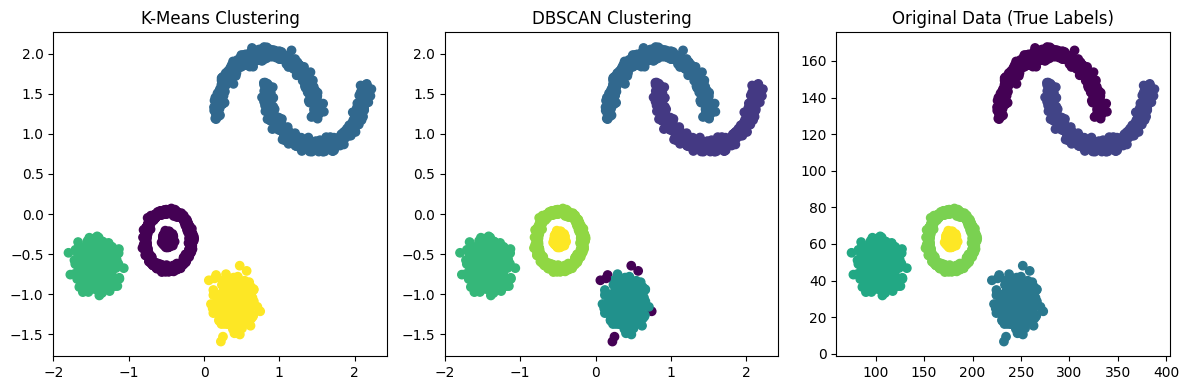

In [6]:
#plots for Question 3
# Task 1 - K-Means with k = 4 (clustering is made same as question 1)
kmeans = KMeans(n_clusters=4, random_state=random_state)
kmeans.fit(seperate.features)
kmeans_cluster_labels = kmeans.labels_

# Task 2 - DBSCAN for epsilon is 0.1 and min_sample is 5 (clustering is made same as question 2)
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(seperate.features)
dbscan_cluster_labels = dbscan.labels_

# Plotting the clusters
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot Task 1 - K-Means
axes[0].scatter(seperate.features[:, 0], seperate.features[:, 1], c=kmeans_cluster_labels, cmap='viridis')
axes[0].set_title("K-Means Clustering")

# Plot Task 2 - DBSCAN
axes[1].scatter(seperate.features[:, 0], seperate.features[:, 1], c=dbscan_cluster_labels, cmap='viridis')
axes[1].set_title("DBSCAN Clustering")

# Plot original data based on true labels
axes[2].scatter(data_frame['x0'], data_frame['x1'], c=data_frame['y'], cmap='viridis')
axes[2].set_title("Original Data (True Labels)")

plt.tight_layout()
plt.show()



Question 3 Descriptions: <br>
Note: Plots' ranges are different because I performe standardization on feature values for clusterings. So 3rd plot's range is different. <br>
1. Did you obtain the same optimal k values in Task1 and Task2? <br>
    1. I did not obtain the same optimal k values in Task1 and Task2. In task 1 I obtained optimal k value as 4 and in task 2 I obtained optimal k value as 6. <br>
2. Comment on the quality of the clusters that you obtained in Task1 and Task2. <br>
    1. For K-Means: The scatter plot shows that the K-Means algorithm was successful in separating the data into various groups.
        K-Means clusters appear to be well-separated and somewhat compact.
        It is important to remember, however, that K-Means assumes clusters are spherical, evenly sized, and have similar densities. In real-world settings, this assumption may not always hold true. <br>
        For example, when we look at our case in K-means clustering plot -0.5, -0.25 is labeled as its outter circle but in our data true laelbs they are different. <br>
        Overall K-means' quality for optimal k is worst than the DBSCAN
    2. For DBSCAN: The scatter plot shows that DBSCAN recognized clusters of varied forms and densities.
        DBSCAN was excellent in capturing clusters of various sizes and forms.
        DBSCAN is more resistant to outliers and can handle non-linear cluster forms, making it appropriate for large datasets. <br>
        So overall quality of DBSCAN clustering is better than K-means and it is nearly same as true labels.
3. Can clustering be used to anticipate the data's actual label?<br>
    1. Unsupervised learning approaches such as K-Means and DBSCAN attempt to merge similar data items without using labels.
    2. Clustering algorithms can discover patterns and groups in data, but they cannot predict the labels that the data will actually have.
    3. However, the clusters discovered by clustering algorithms may occasionally match the proper labels, especially if the clusters correspond to different groups in the data( like DBSCAN output and actual dataset).
4. Which algorithm gave a better result?<br>
    1. I think for optimal values DBSCAN gives a better result because its Adjusted Rand score is 0.997 and K-means' silhouette_scores is 0.71. I cannot compare them as same attribute but DBSCAN is proportionally better in this sense. Also when we compare plots we can see it cleary DBSCAN gives better result.
5. What could be the reason one of them outperforms in different cases? <br>
    1.  INFO: K-Means tends to perform well when clusters are spherical, evenly sized, and have similar densities. It may struggle with irregularly shaped clusters or datasets with varying cluster densities. <br>
        INFO: DBSCAN, on the other hand, is more flexible and can handle clusters of different shapes and sizes. It is particularly useful when dealing with datasets containing noise and outliers. <br>
        Based on this informations the reason one of them outperforms in different cases can be  data distribution, cluster shapes, noise level, and the choice of algorithm parameters (e.g., k, epsilon, min_samples). <br>
        Also the applicability of a clustering method is determined by the features of the dataset and the desired outcome, and it is frequently required to experiment with many algorithms and parameters to discover the optimum approach. <br>
        So I think the main reason is our dataset and desired usage. If I want to use them to predict true labels DBSCAN outğerforms but When I want to group them based on density K-Means outperforms.